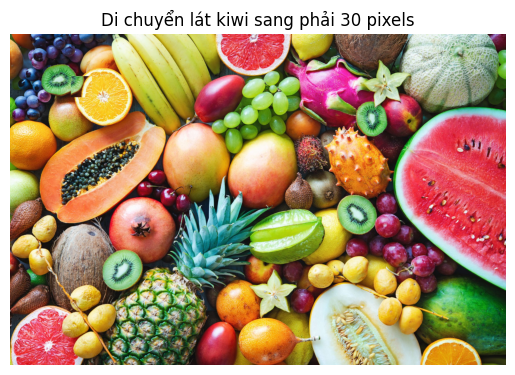

In [ ]:
import numpy as np
import imageio.v2 as iio
import matplotlib.pyplot as plt


data = iio.imread('exercise/colorful-ripe-tropical-fruits.jpg')


result = data.copy()


y1, y2 = 180, 270
x1, x2 = 230, 320


kiwi = data[y1:y2, x1:x2].copy()


result[y1:y2, x1+30:x2+30] = kiwi


plt.imshow(result)
plt.title('Di chuyển lát kiwi sang phải 30 pixels')
plt.axis('off')
plt.show()


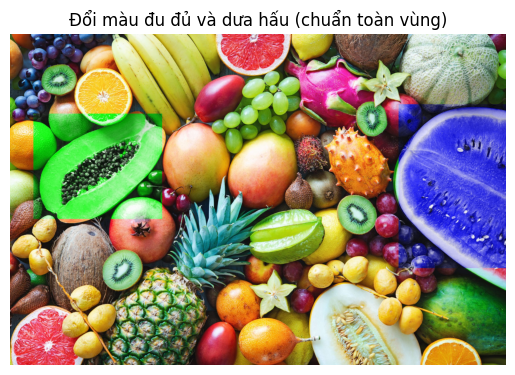

In [ ]:
import imageio.v2 as iio
import numpy as np
import matplotlib.pyplot as plt
import cv2


img = iio.imread('exercise/colorful-ripe-tropical-fruits.jpg')
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)


y1, y2 = 340, 790
x1, x2 = 100, 650
papaya = img[y1:y2, x1:x2]
papaya_hsv = cv2.cvtColor(papaya, cv2.COLOR_BGR2HSV)
papaya_hsv[:, :, 0] = 60 
img[y1:y2, x1:x2] = cv2.cvtColor(papaya_hsv, cv2.COLOR_HSV2BGR)


y1, y2 = 300, 1000
x1, x2 = 1660, 3500
melon = img[y1:y2, x1:x2]
melon_hsv = cv2.cvtColor(melon, cv2.COLOR_BGR2HSV)
melon_hsv[:, :, 0] = 120  
img[y1:y2, x1:x2] = cv2.cvtColor(melon_hsv, cv2.COLOR_HSV2BGR)


img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


plt.imshow(img_rgb)
plt.axis('off')
plt.title("Đổi màu đu đủ và dưa hấu (chuẩn toàn vùng)")
plt.show()


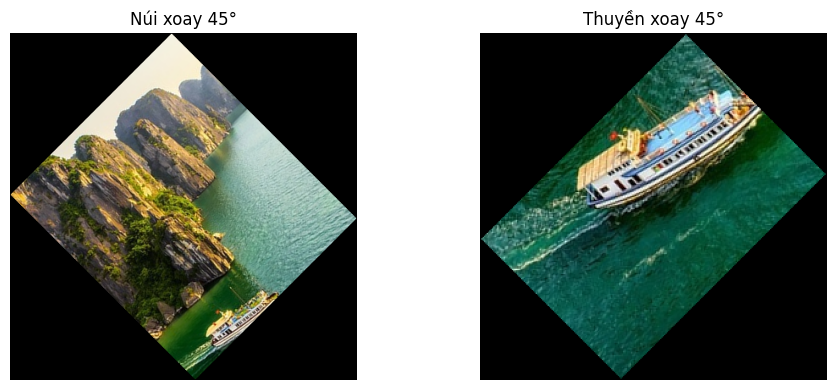

In [ ]:
import imageio.v2 as iio
import numpy as np
import matplotlib.pyplot as plt
import cv2
from scipy.ndimage import rotate


img = iio.imread('exercise/quang_ninh.jpg')


mountain = img[80:390, 520:790]
rotated_mountain = rotate(mountain, angle=45, reshape=True)


iio.imwrite('mountain_rotated.jpg', rotated_mountain)


boat = img[450:600, 420:640]
rotated_boat = rotate(boat, angle=45, reshape=True)


iio.imwrite('boat_rotated.jpg', rotated_boat)


plt.figure(figsize=(10,4))

plt.subplot(1, 2, 1)
plt.imshow(rotated_mountain)
plt.title("Núi xoay 45°")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(rotated_boat)
plt.title("Thuyền xoay 45°")
plt.axis('off')

plt.tight_layout()
plt.show()


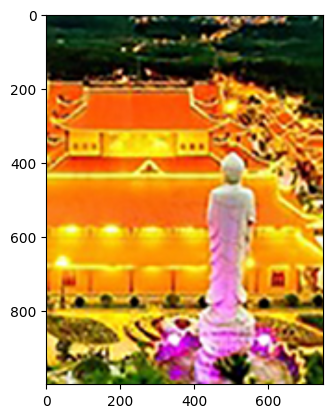

In [ ]:
import imageio.v2 as iio
import cv2


img = iio.imread('exercise/pagoda.jpg')


pagoda = img[100:300, 220:370]


pagoda_upscaled = cv2.resize(pagoda, None, fx=5, fy=5, interpolation=cv2.INTER_LINEAR)


iio.imwrite('pagoda_upscaled.jpg', pagoda_upscaled)

plt.imshow(pagoda_upscaled)

📌 CHỌN TÁC VỤ:
T - Tịnh tiến
X - Xoay
P - Phóng to
H - Thu nhỏ
C - Xem tọa độ ảnh

📂 DANH SÁCH ẢNH TRONG 'exercise/':
1 - colorful-ripe-tropical-fruits.jpg
2 - fruit_result.jpg
3 - ha-long-bay-in-vietnam.jpg
4 - output_fruits_colored.jpg
5 - pagoda.jpg
6 - quang_ninh.jpg
7 - result_fruits_colored.jpg
8 - result_fruits_colored_corrected.jpg
9 - result_fruits_final.jpg


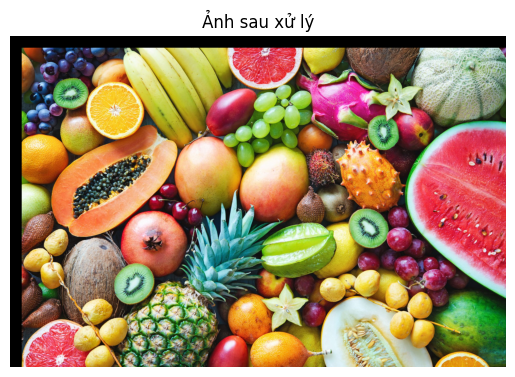

✅ Đã lưu ảnh kết quả: result_colorful-ripe-tropical-fruits.jpg


In [ ]:
import os
import cv2
import numpy as np
from scipy.ndimage import shift, rotate, zoom
import matplotlib.pyplot as plt


def translate(img, dx=50, dy=50):
    return shift(img, (dy, dx, 0)).astype(np.uint8)

def rotate_img(img, angle=45):
    return rotate(img, angle, reshape=True).astype(np.uint8)

def zoom_in(img, factor=2):
    return zoom(img, (factor, factor, 1), order=1).astype(np.uint8)

def zoom_out(img, factor=0.5):
    return zoom(img, (factor, factor, 1), order=1).astype(np.uint8)

def show_coords(img):
    coords = []
    clone = img.copy()

    def click_event(event, x, y, flags, param):
        if event == cv2.EVENT_LBUTTONDOWN:
            print(f"Tọa độ: ({x}, {y})")
            coords.append((x, y))
            cv2.circle(clone, (x, y), 5, (0, 0, 255), -1)
            cv2.imshow("Click để lấy tọa độ", clone)

    cv2.imshow("Click để lấy tọa độ", img)
    cv2.setMouseCallback("Click để lấy tọa độ", click_event)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    return coords


folder = "exercise"
if not os.path.exists(folder):
    print("❌ Thư mục 'exercise' không tồn tại.")
    exit()

images = [f for f in os.listdir(folder) if f.lower().endswith(('.jpg', '.png', '.jpeg'))]
if not images:
    print("❌ Không tìm thấy ảnh nào trong thư mục 'exercise'.")
    exit()


print("📌 CHỌN TÁC VỤ:")
print("T - Tịnh tiến")
print("X - Xoay")
print("P - Phóng to")
print("H - Thu nhỏ")
print("C - Xem tọa độ ảnh")
choice = input("Nhập lựa chọn (T/X/P/H/C): ").strip().upper()

print("\n📂 DANH SÁCH ẢNH TRONG 'exercise/':")
for idx, name in enumerate(images, start=1):
    print(f"{idx} - {name}")
img_idx = int(input("Nhập số thứ tự ảnh muốn chọn: ").strip()) - 1

if 0 <= img_idx < len(images):
    filename = images[img_idx]
    path = os.path.join(folder, filename)
    img = cv2.imread(path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    result = None

    if choice == "T":
        result = translate(img_rgb)
    elif choice == "X":
        result = rotate_img(img_rgb)
    elif choice == "P":
        result = zoom_in(img_rgb)
    elif choice == "H":
        result = zoom_out(img_rgb)
    elif choice == "C":
        show_coords(img)
    else:
        print("❌ Lựa chọn không hợp lệ.")

    if result is not None:
       
        plt.imshow(result)
        plt.axis('off')
        plt.title("Ảnh sau xử lý")
        plt.show()

        outname = f"result_{filename}"
        result_bgr = cv2.cvtColor(result, cv2.COLOR_RGB2BGR)
        cv2.imwrite(outname, result_bgr)
        print(f"✅ Đã lưu ảnh kết quả: {outname}")
else:
    print("❌ Số thứ tự ảnh không hợp lệ.")
